In [1]:
from sklearn import svm
from sklearn.metrics import roc_curve

# question 1 programming coursework 
#up2237432

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import os
print(os.getcwd())

C:\Users\ianth\portfolio data analysis course


In [21]:
psyco = pd.read_csv("psyco (1).csv")  

In [22]:
psyco.describe()


,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000


In [23]:
psyco.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


In [24]:
psyco.isnull().count()

age               1175
gender            1175
occupation        1175
line_of_work      1175
time_bp           1175
time_dp           1175
travel_time       1175
easeof_online     1175
home_env          1175
prod_inc          1175
sleep_bal         1175
new_skill         1175
fam_connect       1175
relaxed           1175
self_time         1175
like_hw           1175
dislike_hw        1175
prefer            1175
certaindays_hw    1175
dtype: int64

In [25]:
psyco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1175 non-null   object 
 1   gender          1175 non-null   object 
 2   occupation      1175 non-null   object 
 3   line_of_work    479 non-null    object 
 4   time_bp         1175 non-null   int64  
 5   time_dp         1175 non-null   int64  
 6   travel_time     1175 non-null   float64
 7   easeof_online   1175 non-null   int64  
 8   home_env        1175 non-null   int64  
 9   prod_inc        1175 non-null   float64
 10  sleep_bal       1175 non-null   float64
 11  new_skill       1175 non-null   float64
 12  fam_connect     1175 non-null   float64
 13  relaxed         1175 non-null   float64
 14  self_time       1175 non-null   float64
 15  like_hw         1175 non-null   int64  
 16  dislike_hw      1175 non-null   int64  
 17  prefer          1175 non-null   o

In [26]:
psyco.count()

age               1175
gender            1175
occupation        1175
line_of_work       479
time_bp           1175
time_dp           1175
travel_time       1175
easeof_online     1175
home_env          1175
prod_inc          1175
sleep_bal         1175
new_skill         1175
fam_connect       1175
relaxed           1175
self_time         1175
like_hw           1175
dislike_hw        1175
prefer            1175
certaindays_hw    1175
dtype: int64

In [27]:
psyco.shape


(1175, 19)

In [28]:
psyco['age'].value_counts()

age
19-25     345
26-32     261
40-50     181
50-60     170
33-40     102
Dec-18     74
60+        42
Name: count, dtype: int64

In [29]:
psyco['gender'].value_counts()

gender
Male                 649
Female               518
Prefer not to say      8
Name: count, dtype: int64

In [30]:
psyco['occupation'].value_counts()

occupation
Working Professional                                    479
Student in College                                      358
Entrepreneur                                            119
Homemaker                                                82
Medical Professional aiding efforts against COVID-19     73
Currently Out of Work                                    44
Student in School                                        18
Retired/Senior Citizen                                    2
Name: count, dtype: int64

In [31]:
psyco['line_of_work'].value_counts()

line_of_work
Teaching               217
Engineering            116
Management              66
Other                   40
Government Employee     35
Architect                3
APSPDCL                  1
Architecture             1
Name: count, dtype: int64

In [32]:
psyco['time_bp'].value_counts()

time_bp
7     412
9     343
5     283
11     53
12     51
4      33
Name: count, dtype: int64

In [33]:
psyco['time_dp'].value_counts()

time_dp
9     326
7     238
5     180
12    169
4     149
11    113
Name: count, dtype: int64

In [34]:
psyco['travel_time'].value_counts()

travel_time
0.5    699
1.5    343
2.5    111
3.0     22
Name: count, dtype: int64

In [35]:
psyco['easeof_online'].value_counts()

easeof_online
1    329
2    285
4    249
3    239
5     73
Name: count, dtype: int64

In [36]:
easeofonline_mapping = {1:'Very Easy', 2:'Easy', 3:'Average', 4:'Hard', 5:'Very Hard'}

psyco['easeof_online'] = psyco['easeof_online'].map(easeofonline_mapping)
easeofonline_counts = psyco['easeof_online'].value_counts()
print(easeofonline_counts)

easeof_online
Very Easy    329
Easy         285
Hard         249
Average      239
Very Hard     73
Name: count, dtype: int64


In [37]:
psyco['home_env'].value_counts()

home_env
3    327
2    309
1    215
4    200
5    124
Name: count, dtype: int64

In [38]:
homeenvironment_mapping = {1:'Quiet', 2:'Slightly Quiet', 3:'Average', 4:'Noisy', 5:'Very Noisy'}

psyco['home_env'] = psyco['home_env'].map(homeenvironment_mapping)
homeenvironment_counts = psyco['home_env'].value_counts()
print(homeenvironment_counts)

home_env
Average           327
Slightly Quiet    309
Quiet             215
Noisy             200
Very Noisy        124
Name: count, dtype: int64


In [39]:
psyco['prod_inc'].value_counts()

prod_inc
 0.5    302
 0.0    295
-0.5    279
-1.0    150
 1.0    149
Name: count, dtype: int64

In [40]:
productivity_mapping = {-1:'No productivity change', -0.5:'Noticeable productivity change', 0:'Very slight productivity change', 0.5:'Slight increase in productivity change', 1:'Substantial productivity increase change' }

psyco['prod_inc'] = psyco['prod_inc'].map(productivity_mapping)
productivity_counts = psyco['prod_inc'].value_counts()
print(productivity_counts)

prod_inc
Slight increase in productivity change      302
Very slight productivity change             295
Noticeable productivity change              279
No productivity change                      150
Substantial productivity increase change    149
Name: count, dtype: int64


In [41]:
psyco['sleep_bal'].value_counts()

sleep_bal
-0.5    313
 0.5    271
 0.0    270
-1.0    214
 1.0    107
Name: count, dtype: int64

In [42]:
sleep_bal_mapping = {-1:'Agree', -0.5:'Disagree', 0:'Strongly Disagree', 0.5:'No difference', 1:'Strongly Agree' }

psyco['sleep_bal'] = psyco['sleep_bal'].map(sleep_bal_mapping)
sleep_bal_counts = psyco['sleep_bal'].value_counts()
print(sleep_bal_counts)

sleep_bal
Disagree             313
No difference        271
Strongly Disagree    270
Agree                214
Strongly Agree       107
Name: count, dtype: int64


In [43]:
psyco['new_skill'].value_counts()

new_skill
 0.5    366
-0.5    249
 1.0    236
 0.0    202
-1.0    122
Name: count, dtype: int64

In [44]:
newskill_mapping = {-1:'One', -0.5:'Two', 0:'None', 0.5:'Three to four', 1:'Five or more' }

psyco['new_skill'] = psyco['new_skill'].map(newskill_mapping)
newskill_counts = psyco['new_skill'].value_counts()
print(newskill_counts)

new_skill
Three to four    366
Two              249
Five or more     236
None             202
One              122
Name: count, dtype: int64


In [45]:
psyco['fam_connect'].value_counts()

fam_connect
 0.5    414
 1.0    326
-1.0    181
 0.0    162
-0.5     92
Name: count, dtype: int64

In [46]:
famconnect_mapping = {-1:'Neither agree nor disagree', -0.5:'Disagree', 0:'Strongly disagree', 0.5:'Strongly agree', 1:'Agree' }

psyco['fam_connect'] = psyco['fam_connect'].map(famconnect_mapping)
famconnect_counts = psyco['fam_connect'].value_counts()
print(famconnect_counts)

fam_connect
Strongly agree                414
Agree                         326
Neither agree nor disagree    181
Strongly disagree             162
Disagree                       92
Name: count, dtype: int64


In [47]:
psyco['relaxed'].value_counts()

relaxed
 0.0    306
 0.5    274
-0.5    268
 1.0    183
-1.0    144
Name: count, dtype: int64

In [48]:
relaxed_mapping = {-1:'Agree', -0.5:'Disagree', 0:'slightly disagree', 0.5:'Neither agree or disagree', 1:'Disagree majorly' }

psyco['relaxed'] = psyco['relaxed'].map(relaxed_mapping)
relaxed_counts = psyco['relaxed'].value_counts()
print(relaxed_counts)

relaxed
slightly disagree            306
Neither agree or disagree    274
Disagree                     268
Disagree majorly             183
Agree                        144
Name: count, dtype: int64


In [49]:
psyco['self_time'].value_counts()

self_time
 0.0    417
 0.5    289
-0.5    252
 1.0    148
-1.0     69
Name: count, dtype: int64

In [50]:
selftime_mapping = {-1:'Disagree', -0.5:'No difference', 0:'Agree', 0.5:'Strongly agree', 1:'Agree substantially'}

psyco['self_time'] = psyco['self_time'].map(selftime_mapping)
selftime_counts = psyco['self_time'].value_counts()
print(selftime_counts)

self_time
Agree                  417
Strongly agree         289
No difference          252
Agree substantially    148
Disagree                69
Name: count, dtype: int64


In [51]:
psyco['like_hw'].value_counts()

like_hw
100     233
1100    188
1000    188
1110    188
1111     95
10       64
110      61
1010     55
1001     42
1        17
1011     17
11        9
1101      7
101       6
111       5
Name: count, dtype: int64

In [52]:
psyco['dislike_hw'].value_counts()

dislike_hw
1111    264
1       211
1000    150
101     110
1100     87
111      67
1101     61
1011     59
100      45
1010     30
1001     21
1110     20
10       20
110      19
11       11
Name: count, dtype: int64

In [53]:
psyco['prefer'].value_counts()

prefer
Complete Physical Attendance    836
Work/study from home            339
Name: count, dtype: int64

In [54]:
psyco['certaindays_hw'].value_counts()

certaindays_hw
Yes      568
No       309
Maybe    298
Name: count, dtype: int64

In [55]:
#saving of the information to csv
psyco.to_csv('q2onwardsuse')

In [56]:
#charts to show statistics. 
#1. travel time line graph
#2. bar chart for gender
#3. pie chart for occupation

Text(0, 0.5, 'Quantity of travelers')

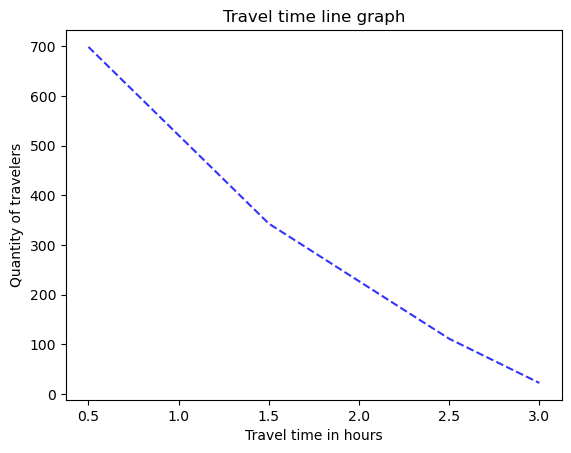

In [57]:
psyco['travel_time'].value_counts().plot(linestyle='--', kind = 'line', color = 'blue', alpha=0.8)

plt.title('Travel time line graph')
plt.xlabel('Travel time in hours')
plt.ylabel('Quantity of travelers')

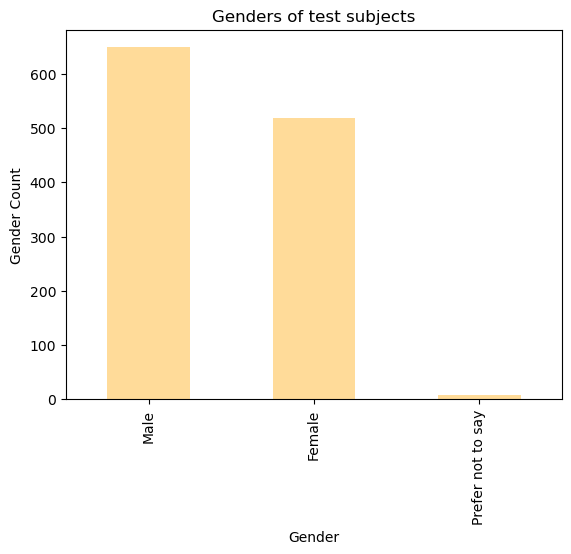

In [58]:
psyco['gender'].value_counts().plot(kind = 'bar', color='orange', alpha = 0.4)

plt.title('Genders of test subjects')
plt.xlabel('Gender')
plt.ylabel('Gender Count')
plt.show()

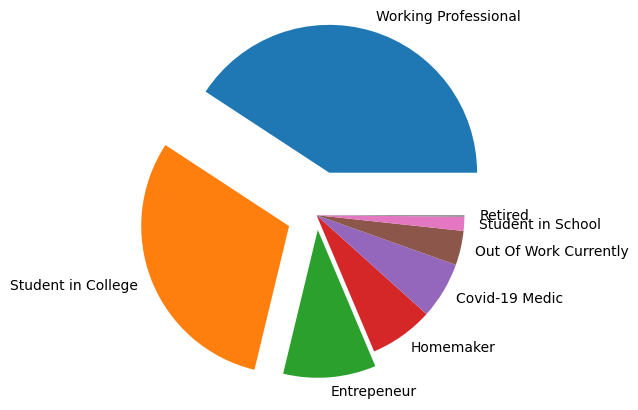

In [59]:
#occupation 
x = np.array([479,358,119,82,73,44,18,2])
mylabels = ['Working Professional','Student in College','Entrepeneur','Homemaker','Covid-19 Medic','Out Of Work Currently','Student in School','Retired']
myexplode = [0.3, 0.2, 0.1, 0, 0, 0, 0, 0]
plt.pie(x, labels = mylabels, explode = myexplode)
plt.show() 

<Axes: xlabel='Count', ylabel='Line_of_work'>

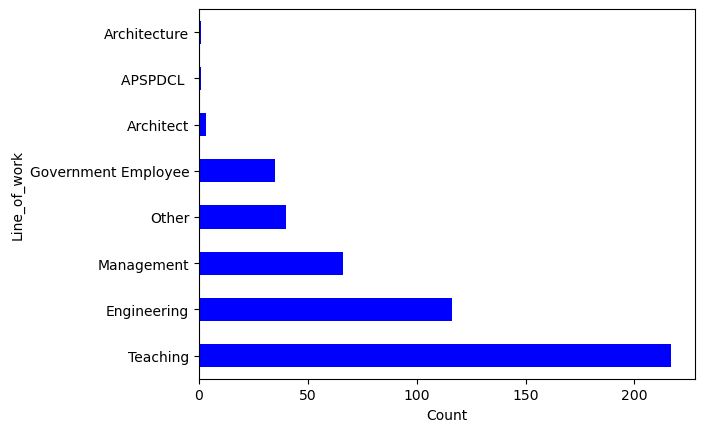

In [60]:
psyco['line_of_work'].value_counts().plot.barh(color='blue', alpha=1, xlabel='Count', ylabel='Line_of_work')

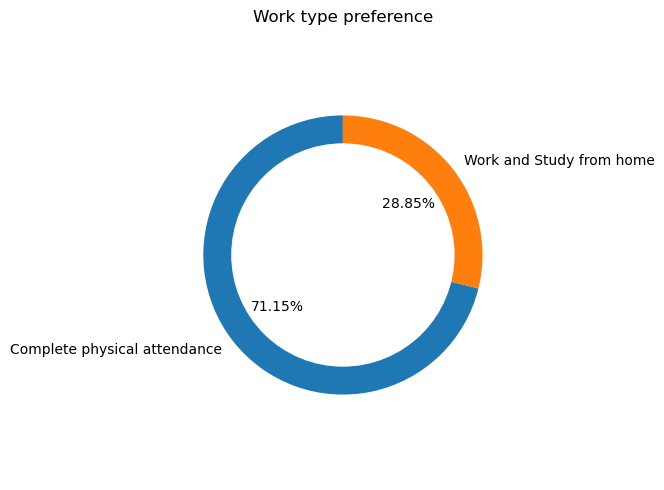

In [61]:
#Donut chart for work type preference
labels = ['Complete physical attendance', 'Work and Study from home']
 

fig, ax = plt.subplots()
ax.pie(psyco['prefer'].value_counts(),labels=labels, autopct='%1.2f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw a circle at the center to transform it into a donut chart
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

plt.tight_layout()
plt.title('Work type preference')
plt.show()



In [62]:
crosstb = pd.crosstab(psyco['gender'],psyco.relaxed)
crosstb

relaxed,Agree,Disagree,Disagree majorly,Neither agree or disagree,slightly disagree
gender,,,,,
Female,58,161,107,122,70
Male,82,107,74,152,234
Prefer not to say,4,0,2,0,2


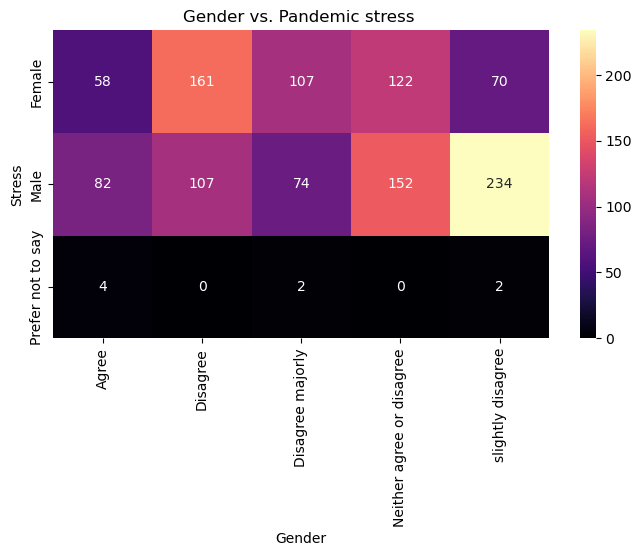

In [63]:
#a heatmap to show the relationship between gender and how relaxed they feel 
import seaborn as sns
crosstb = pd.crosstab(psyco['gender'],psyco.relaxed)
plt.figure(figsize=(8, 4))
sns.heatmap(crosstb, cmap='magma', annot=True, fmt='d', cbar=True)
plt.title('Gender vs. Pandemic stress ')
plt.xlabel('Gender')
plt.ylabel('Stress')
plt.show()

In [64]:
gendertimetravel = pd.crosstab(psyco['gender'], psyco['travel_time'])
gendertimetravel

travel_time,0.5,1.5,2.5,3.0
gender,,,,
Female,324,129,62,3
Male,372,213,47,17
Prefer not to say,3,1,2,2


Text(0, 0.5, 'Travel_time')

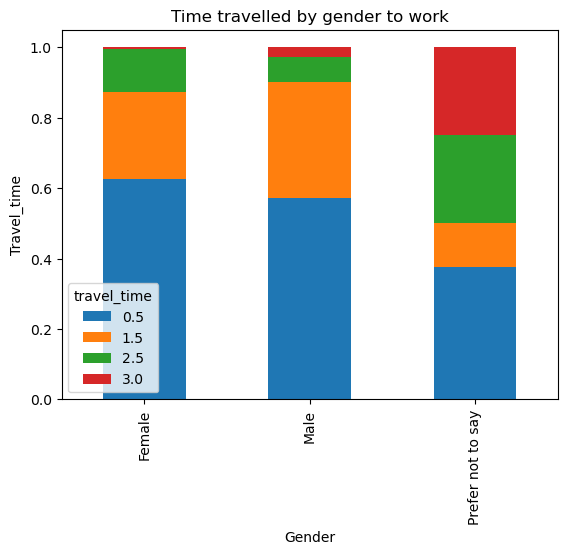

In [65]:
# Plot the cross tab:
# Normalization of the cross tab to sum to 1:
gendertimetravel = gendertimetravel.div(gendertimetravel.sum(1).astype(float), axis=0)

gendertimetravel.plot(kind='bar', 
                   stacked=True, 
                   title='Time travelled by gender to work')
plt.xlabel('Gender')
plt.ylabel('Travel_time')

In [66]:
psyco = pd.read_csv('q2onwardsuse')

In [67]:
psyco.isnull().sum()

Unnamed: 0          0
age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill         202
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64

In [68]:
psyco['line_of_work'] = psyco['line_of_work'].fillna('Student')

In [69]:
import statistics
psyco['new_skill'] = psyco['new_skill'].fillna(statistics.mode(psyco['new_skill']))

In [70]:
specific_value = 'Dec-18'
filtered_psycoage = psyco[psyco['age'] == specific_value]
print(filtered_psycoage)

     Unnamed: 0     age  gender          occupation line_of_work  time_bp  \
1             1  Dec-18    Male   Student in School      Student        7   
68           68  Dec-18    Male   Student in School      Student        7   
73           73  Dec-18    Male  Student in College      Student        7   
80           80  Dec-18  Female   Student in School      Student        7   
85           85  Dec-18    Male   Student in School      Student        7   
..          ...     ...     ...                 ...          ...      ...   
884         884  Dec-18    Male  Student in College      Student        7   
891         891  Dec-18    Male  Student in College      Student        5   
893         893  Dec-18    Male  Student in College      Student        7   
900         900  Dec-18    Male  Student in College      Student        5   
902         902  Dec-18    Male  Student in College      Student        7   

     time_dp  travel_time easeof_online        home_env  \
1         11    

In [71]:
filtered_psycoage['occupation'].value_counts()

occupation
Student in College    56
Student in School     18
Name: count, dtype: int64

In [72]:
psyco['age'].replace('Dec-18', '4-18')

0       19-25
1        4-18
2       19-25
3       19-25
4       19-25
        ...  
1170    40-50
1171    26-32
1172    26-32
1173    26-32
1174    40-50
Name: age, Length: 1175, dtype: object

In [73]:
#dropping of gender third option 'Prefer not to say'
psyco = psyco[psyco['gender'] != 'Prefer not to say']

In [74]:
#the dropping of columns like_hw and dislike_hw
psyco = psyco.drop(columns=['like_hw', 'dislike_hw'])

In [75]:
#use of labelencoder to convert data to make it ready for use for the models in question 3, 4 and 5
#transformation of the data into numerical data as it is all categorical 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

psyco['age'] = LE.fit_transform(psyco['age'])
psyco['gender'] = LE.fit_transform(psyco['gender'])
psyco['occupation'] = LE.fit_transform(psyco['occupation'])
psyco['line_of_work'] = LE.fit_transform(psyco['line_of_work'])
psyco['easeof_online'] = LE.fit_transform(psyco['easeof_online'])
psyco['home_env'] = LE.fit_transform(psyco['home_env'])
psyco['prod_inc'] = LE.fit_transform(psyco['prod_inc'])
psyco['sleep_bal'] = LE.fit_transform(psyco['sleep_bal'])
psyco['new_skill'] = LE.fit_transform(psyco['new_skill'])
psyco['fam_connect'] = LE.fit_transform(psyco['fam_connect'])
psyco['relaxed'] = LE.fit_transform(psyco['relaxed'])
psyco['self_time'] = LE.fit_transform(psyco['self_time'])
psyco['prefer'] = LE.fit_transform(psyco['prefer'])
psyco['certaindays_hw'] = LE.fit_transform(psyco['certaindays_hw'])


In [76]:
#scaling of time_bp, time_dp, travel-time to fit the above
from sklearn.preprocessing import MinMaxScaler
data_to_scale = ([psyco['time_bp'], psyco['time_dp'], psyco['travel_time']])
scaler = MinMaxScaler()
scaler.fit(data_to_scale)

scaled_data = scaler.transform(data_to_scale)

print(scaled_data)

[[1.         0.61904762 1.         ... 0.80952381 0.9047619  1.        ]
 [0.69230769 1.         1.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [77]:
psyco.head()

,Unnamed: 0,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw
0,0,0,1,5,7,7,5,0.5,0,0,4,4,2,0,1,3,0,2
1,1,6,1,6,7,7,11,0.5,2,3,1,2,1,0,2,1,0,1
2,2,0,1,5,7,7,7,1.5,1,3,3,4,2,3,3,4,0,2
3,3,0,1,5,7,7,7,1.5,0,2,4,3,2,4,0,3,0,2
4,4,0,0,5,7,7,7,1.5,1,3,4,4,2,4,3,0,0,2


In [78]:
psyco = psyco.drop(columns = 'Unnamed: 0')

In [79]:
psyco.to_csv('datapreppedforq345')

In [80]:
#Question 3 programming coursework
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [81]:
psyco1 = pd.read_csv('datapreppedforq345')

In [82]:
#the dropping of column unnamed = 0
psyco1 = psyco1.drop(columns=['Unnamed: 0'])

In [83]:
psyco1.keys()

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'prefer',
       'certaindays_hw'],
      dtype='object')

In [84]:
psyco1 = psyco1[['age', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'prefer',
       'certaindays_hw', 'gender']]

In [85]:
psyco1

,age,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,gender
0,0,5,7,7,5,0.5,0,0,4,4,2,0,1,3,0,2,1
1,6,6,7,7,11,0.5,2,3,1,2,1,0,2,1,0,1,1
2,0,5,7,7,7,1.5,1,3,3,4,2,3,3,4,0,2,1
3,0,5,7,7,7,1.5,0,2,4,3,2,4,0,3,0,2,1
4,0,5,7,7,7,1.5,1,3,4,4,2,4,3,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,3,1,7,9,9,0.5,1,2,2,1,3,3,4,0,0,2,0
1163,1,2,7,5,12,0.5,0,4,1,0,3,4,1,3,0,0,0
1164,1,7,3,9,11,0.5,0,3,2,2,2,3,4,0,0,0,1
1165,1,7,3,11,12,1.5,1,3,4,4,2,2,4,3,0,2,1


In [86]:
x = psyco1.iloc[:,:-1].values  #predictor attributes
y = psyco1.iloc[:,-1].values   #target attribute

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [88]:
#Kayne Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

clf = KNeighborsClassifier(n_neighbors=4, weights='distance')

clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

# Evaluation measures
print ("Accuracy = %.2f" % metrics.accuracy_score(y_test, y_predict))
print ("Precision: %.2f" % metrics.precision_score(y_test, y_predict, average='weighted'))
print ("Recall: %.2f" % metrics.recall_score(y_test, y_predict, average='weighted'))
print ("F1 Measure: %.2f" % metrics.f1_score(y_test, y_predict, average='weighted'))
print ("Confusion Matrix:")
metrics.confusion_matrix(y_test, y_predict)

Accuracy = 0.94
Precision: 0.94
Recall: 0.94
F1 Measure: 0.94
Confusion Matrix:


C:\Users\ianth\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ianth\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ianth\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ianth\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

array([[119,  10],
       [  7, 156]])

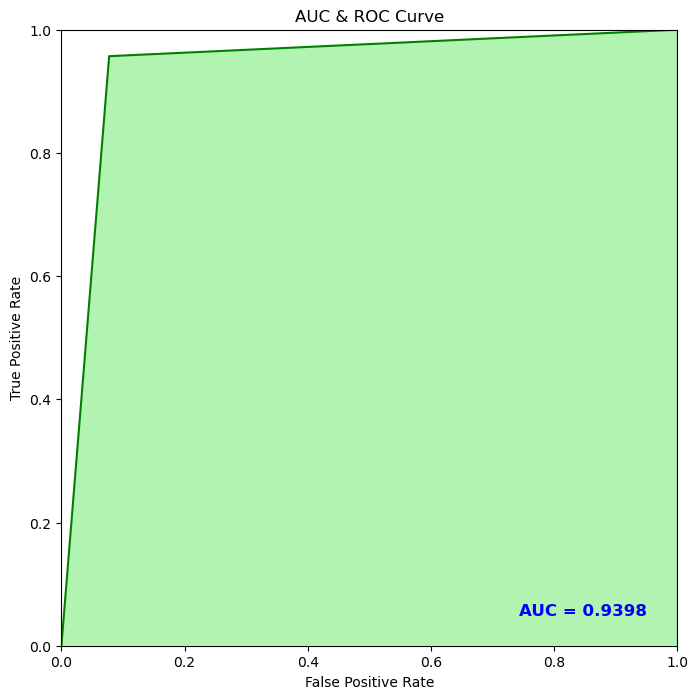

In [89]:
auc = metrics.roc_auc_score(y_test, y_predict)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [90]:
#Support Vector Machine

#importing of classifier
from sklearn.svm import SVC

#initializing of the classifier
SVM = SVC(kernel = 'linear')

#due to the computational difficulties a sample of the data is used 
psycosample = psyco1.sample(frac=0.01, replace=False, random_state=1)
psycosample.describe()

,age,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,gender
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2.666667,5.416667,5.833333,7.833333,9.000000,0.916667,1.833333,1.750000,1.833333,2.166667,1.666667,2.250000,2.500000,2.083333,0.333333,1.333333,0.416667
std,1.556998,2.678478,1.749459,1.800673,2.044949,0.514929,1.267304,1.422226,1.267304,1.193416,1.154701,1.484771,1.623688,1.928652,0.492366,0.887625,0.514929
min,1.000000,1.000000,3.000000,5.000000,4.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.750000,5.000000,7.000000,9.000000,0.500000,1.000000,0.750000,1.000000,1.000000,0.750000,1.500000,1.000000,0.000000,0.000000,0.750000,0.000000
50%,3.000000,7.000000,6.000000,8.000000,9.000000,0.500000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.500000,0.000000,2.000000,0.000000
75%,3.250000,7.000000,7.000000,9.000000,9.500000,1.500000,3.000000,2.250000,2.000000,2.500000,2.250000,3.000000,4.000000,4.000000,1.000000,2.000000,1.000000
max,6.000000,7.000000,8.000000,11.000000,12.000000,1.500000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

SVM = SVM.fit(x_train, y_train)
y_predict = SVM.predict(x_test)

# Evaluation measures
print ("Accuracy = %.2f" % metrics.accuracy_score(y_test, y_predict))
print ("Precision: %.2f" % metrics.precision_score(y_test, y_predict, average='macro'))
print ("Recall: %.2f" % metrics.recall_score(y_test, y_predict, average='macro'))
print ("F1 Measure: %.2f" % metrics.f1_score(y_test, y_predict, average='macro'))
print ("Confusion Matrix:")
metrics.confusion_matrix(y_test, y_predict)

Accuracy = 0.89
Precision: 0.89
Recall: 0.89
F1 Measure: 0.89
Confusion Matrix:


array([[112,  17],
       [ 16, 147]])

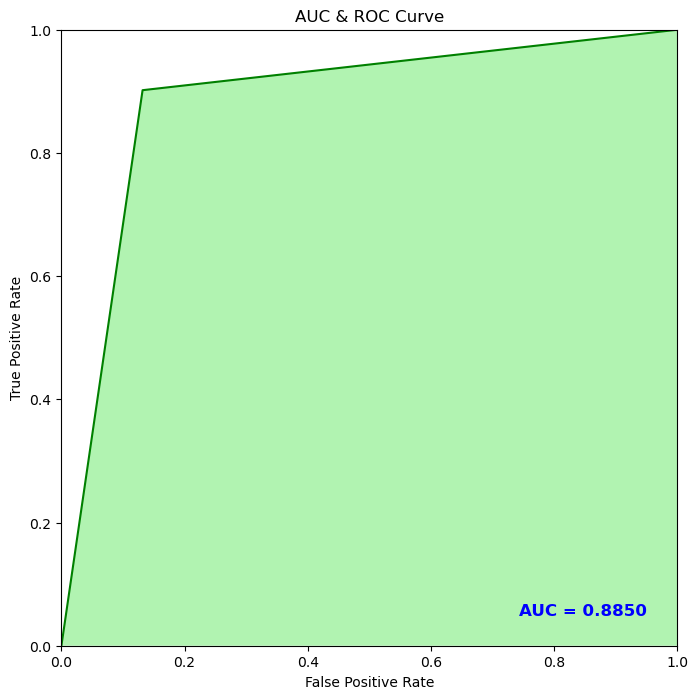

In [92]:
auc = metrics.roc_auc_score(y_test, y_predict)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [93]:
#Neural Networks
from sklearn.neural_network import MLPClassifier

#initializing of the classifier
#MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes-(5,2), random_state=1)
MLP = MLPClassifier(random_state=2)

from sklearn import metrics

MLP = MLP.fit(x_train, y_train)
y_predict = MLP.predict(x_test)

# Evaluation measures
print ("Accuracy = %.2f" % metrics.accuracy_score(y_test, y_predict))
print ("Precision: %.2f" % metrics.precision_score(y_test, y_predict, average='macro'))
print ("Recall: %.2f" % metrics.recall_score(y_test, y_predict, average='macro'))
print ("F1 Measure: %.2f" % metrics.f1_score(y_test, y_predict, average='macro'))
print ("Confusion Matrix:")
metrics.confusion_matrix(y_test, y_predict)

Accuracy = 0.94
Precision: 0.94
Recall: 0.94
F1 Measure: 0.94
Confusion Matrix:


C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[120,   9],
       [  9, 154]])

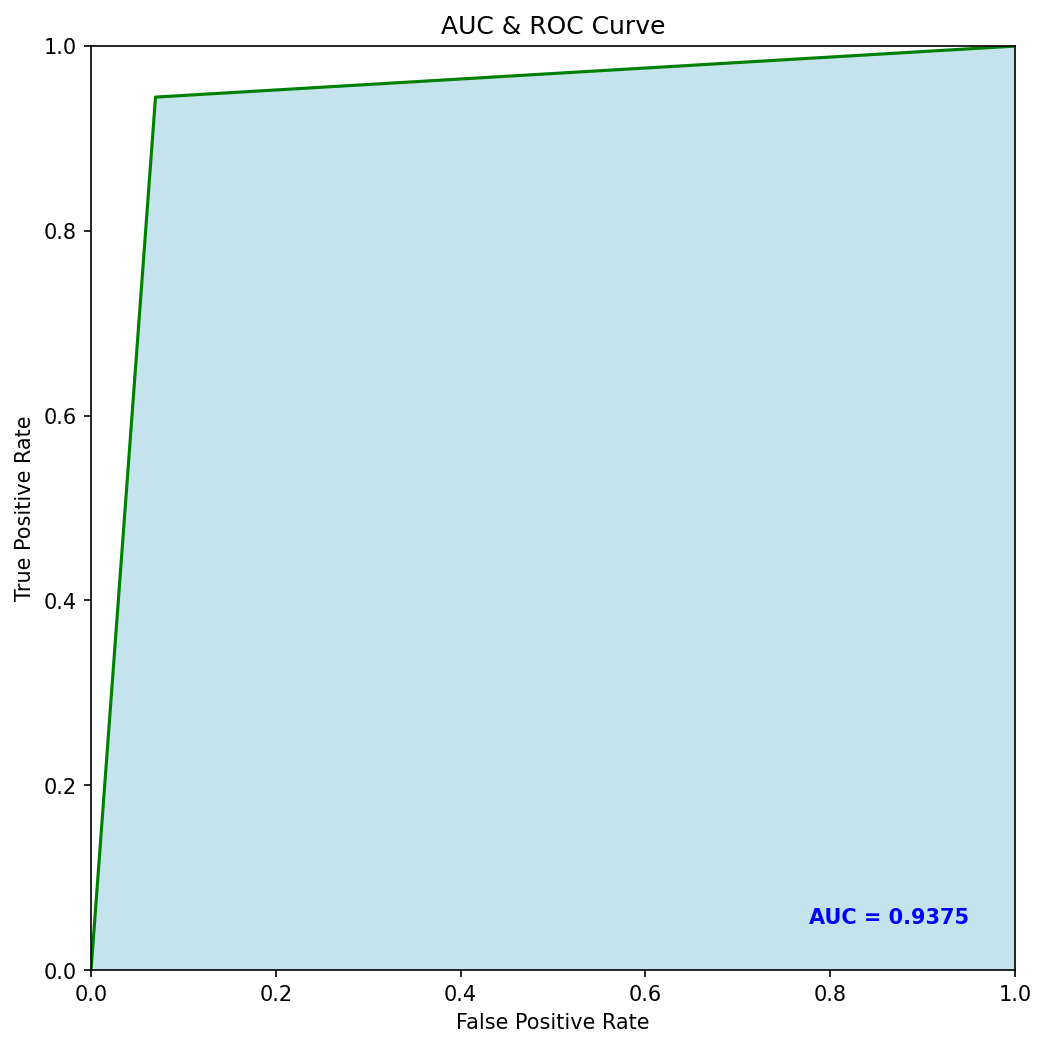

In [94]:
auc = metrics.roc_auc_score(y_test, y_predict)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_predict)

plt.figure(figsize=(10, 8), dpi=150)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=10, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [136]:
#boosting 
!pip install scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
n_estimators = 50  # Number of weak learners to train
learning_rate = 1.0  # Learning rate

adaboost_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

adaboost_clf.fit(x_train, y_train)

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [137]:
y_predict = adaboost_clf.predict(x_test)

# Evaluation measures
print ("Accuracy = %.2f" % metrics.accuracy_score(y_test, y_predict))
print ("Precision: %.2f" % metrics.precision_score(y_test, y_predict, average='macro'))
print ("Recall: %.2f" % metrics.recall_score(y_test, y_predict, average='macro'))
print ("F1 Measure: %.2f" % metrics.f1_score(y_test, y_predict, average='macro'))
print ("Confusion Matrix:")
metrics.confusion_matrix(y_test, y_predict)

NameError: name 'adaboost_clf' is not defined

In [138]:
auc = metrics.roc_auc_score(y_test, y_predict)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_predict)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [234, 292]

In [139]:
from sklearn.model_selection import cross_val_score

data = psyco1
x = psyco1.iloc[:,:-1].values  #predictor attributes
y = psyco1.iloc[:,-1].values   #target attribute

models = {'Adaboost':AdaBoostClassifier(),
         'Neural Networks':MLPClassifier(random_state=2),
         'Support Vector Machine':SVC(kernel = 'linear'),
         'Kayne Nearest Neighbor': KNeighborsClassifier()}

for name, model, in models.items():
    scores = cross_val_score(model, x, y, cv=10, scoring='f1_weighted')
    print(name, scores, scores.mean())

Adaboost [0.43739115 0.73611111 0.93180482 0.92327946 0.95739042 0.96563847
 0.92314507 0.83680553 0.85289245 0.93981243] 0.850427091316272


C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Neural Networks [0.44852941 0.69308469 0.88906751 0.95739042 0.97441558 1.
 1.         0.97403776 1.         0.94841462] 0.8884939989401911
Support Vector Machine [0.4630608  0.63475177 0.88069217 0.90623045 0.8974359  0.91344605
 0.87207791 0.92260579 0.80785235 1.        ] 0.8298153182855701
Kayne Nearest Neighbor [0.53811929 0.62528808 0.88060429 0.90613405 0.96590241 1.
 0.99144412 0.97403776 0.90540513 1.        ] 0.8786935124006977


In [140]:
psyco2 = pd.read_csv('datapreppedforq345')
psyco2.head()

,Unnamed: 0,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw
0,0,0,1,5,7,7,5,0.5,0,0,4,4,2,0,1,3,0,2
1,1,6,1,6,7,7,11,0.5,2,3,1,2,1,0,2,1,0,1
2,2,0,1,5,7,7,7,1.5,1,3,3,4,2,3,3,4,0,2
3,3,0,1,5,7,7,7,1.5,0,2,4,3,2,4,0,3,0,2
4,4,0,0,5,7,7,7,1.5,1,3,4,4,2,4,3,0,0,2


In [141]:
psyco2.keys()

Index(['Unnamed: 0', 'age', 'gender', 'occupation', 'line_of_work', 'time_bp',
       'time_dp', 'travel_time', 'easeof_online', 'home_env', 'prod_inc',
       'sleep_bal', 'new_skill', 'fam_connect', 'relaxed', 'self_time',
       'prefer', 'certaindays_hw'],
      dtype='object')

In [142]:
psyco21 = psyco2[[ 'age', 'occupation',
       'line_of_work', 'time_bp', 'time_dp', 'travel_time', 'easeof_online',
       'home_env', 'prod_inc', 'sleep_bal', 'new_skill', 'fam_connect',
       'relaxed', 'self_time', 'prefer', 'certaindays_hw', 'gender']]

In [143]:
psyco21.head()

,age,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,gender
0,0,5,7,7,5,0.5,0,0,4,4,2,0,1,3,0,2,1
1,6,6,7,7,11,0.5,2,3,1,2,1,0,2,1,0,1,1
2,0,5,7,7,7,1.5,1,3,3,4,2,3,3,4,0,2,1
3,0,5,7,7,7,1.5,0,2,4,3,2,4,0,3,0,2,1
4,0,5,7,7,7,1.5,1,3,4,4,2,4,3,0,0,2,0


In [144]:
x = psyco21.iloc[:,:-1].values #predictor attributes
y = psyco21.iloc[:,-1].values #target attribute

In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [146]:
from sklearn.linear_model import LinearRegression

#initialize the Naive Bayes classifier
LR = LinearRegression()

#fitting of the classifier to the data
LR.fit(x_train, y_train)

#use of the resulting model to preduct value on the test set
y_pred = LR.predict(x_test)

#performance metrics
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R2 score:', r2_score(y_test, y_pred))

#evaluation of the model using the adjusted R2 evaluation metric
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-x_test.shape[1]-1)
print(adj_r2)

Mean Absolute Error: 0.30199327945075044
Mean Squared Error: 0.1290800891787538
Root Mean Squared Error: 0.3592771759780376
R2 score: 0.47658321568757955
-142.9396156859156


In [147]:
#lasso regression 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Fitting Lasso regression
lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter (lambda)
lasso.fit(x_train, y_train)

# Predictions
y_pred = lasso.predict(x_test)

# Evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.3898663972514002
Mean Squared Error: 0.1703492742250941
Root Mean Squared Error: 0.4127339024421111
R2 score: 0.2980927940801228


In [148]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [149]:
psyco5 = pd.read_csv('datapreppedforq345')

In [150]:
psyco5.head()

,Unnamed: 0,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw
0,0,0,1,5,7,7,5,0.5,0,0,4,4,2,0,1,3,0,2
1,1,6,1,6,7,7,11,0.5,2,3,1,2,1,0,2,1,0,1
2,2,0,1,5,7,7,7,1.5,1,3,3,4,2,3,3,4,0,2
3,3,0,1,5,7,7,7,1.5,0,2,4,3,2,4,0,3,0,2
4,4,0,0,5,7,7,7,1.5,1,3,4,4,2,4,3,0,0,2


In [151]:
psyco5 = psyco5.drop(columns=['Unnamed: 0'])

In [152]:
psyco5.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw
0,0,1,5,7,7,5,0.5,0,0,4,4,2,0,1,3,0,2
1,6,1,6,7,7,11,0.5,2,3,1,2,1,0,2,1,0,1
2,0,1,5,7,7,7,1.5,1,3,3,4,2,3,3,4,0,2
3,0,1,5,7,7,7,1.5,0,2,4,3,2,4,0,3,0,2
4,0,0,5,7,7,7,1.5,1,3,4,4,2,4,3,0,0,2


In [153]:
#standardisation of the scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(psyco5.values)
scaled_features_psyco = pd.DataFrame(scaled_features, index=psyco5.index, columns=psyco5.columns)
scaled_features_psyco.describe()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw
count,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03
mean,4.870901e-17,7.306352e-17,2.435451e-17,1.826588e-16,6.088627e-18,8.524077e-17,6.088627e-18,-5.784195e-17,-6.088627e-17,9.437371e-17,-3.044313e-18,6.545274e-17,1.826588e-17,-4.870901e-17,-4.262039e-17,1.522157e-17,1.172061e-16
std,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00
min,-1.071773e+00,-1.119328e+00,-2.181034e+00,-4.365358e+00,-1.706079e+00,-1.493105e+00,-7.388102e-01,-1.420809e+00,-1.265338e+00,-1.567558e+00,-1.365402e+00,-1.685210e+00,-1.378688e+00,-1.656680e+00,-1.134412e+00,-6.358712e-01,-1.491929e+00
25%,-1.071773e+00,-1.119328e+00,-8.482012e-01,3.163552e-01,-1.205074e+00,-1.116277e+00,-7.388102e-01,-6.104061e-01,-1.265338e+00,-8.337674e-01,-6.568984e-01,-6.999193e-01,-1.378688e+00,-9.320375e-01,-1.134412e+00,-6.358712e-01,-1.491929e+00
50%,-5.319546e-01,8.933930e-01,4.035428e-02,3.163552e-01,-2.030638e-01,3.910359e-01,-7.388102e-01,1.999965e-01,1.837783e-01,-9.997663e-02,5.160477e-02,2.853712e-01,5.336856e-03,-2.073954e-01,7.569660e-02,-6.358712e-01,-2.811633e-01
75%,5.476820e-01,8.933930e-01,9.289098e-01,3.163552e-01,7.989466e-01,3.910359e-01,6.746185e-01,1.010399e+00,9.083365e-01,1.367605e+00,7.601079e-01,2.853712e-01,6.973492e-01,1.241889e+00,6.807509e-01,1.572646e+00,9.296026e-01
max,2.167137e+00,8.933930e-01,9.289098e-01,9.851713e-01,2.301962e+00,1.521520e+00,2.794761e+00,1.820802e+00,1.632895e+00,1.367605e+00,1.468611e+00,1.270662e+00,1.389362e+00,1.241889e+00,1.285805e+00,1.572646e+00,9.296026e-01


In [154]:
#k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_features_psyco)

C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [155]:
kmeans.cluster_centers_

array([[-0.22366976,  0.79323386,  0.29934083, -0.76769749,  0.51876361,
         0.07671479,  0.27939435, -0.05541472, -0.06174739, -0.0773717 ,
         0.10868797, -0.33802351, -0.2570375 ,  0.24250084, -0.26267501,
        -0.38989891, -0.30985443],
       [ 0.07779965, -0.86671952, -1.07483682,  0.31093967, -0.81562889,
         0.44748385, -0.00348394,  0.14750081,  0.62379341, -0.34358327,
        -0.28687043, -0.11752087, -0.35047516, -0.86162692, -0.18396234,
         0.50862337, -0.46253309],
       [ 0.15094804, -0.24229913,  0.2794435 ,  0.49631775, -0.03505604,
        -0.28695211, -0.23502788, -0.02620018, -0.25706742,  0.23597576,
         0.05018208,  0.34472606,  0.39164094,  0.22186043,  0.31383043,
         0.07812724,  0.4919764 ]])

In [156]:
#computation of the silhouette score
kmeans_silhouette = silhouette_score(scaled_features_psyco, kmeans.labels_).round(2)
kmeans_silhouette

np.float64(0.1)

In [157]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

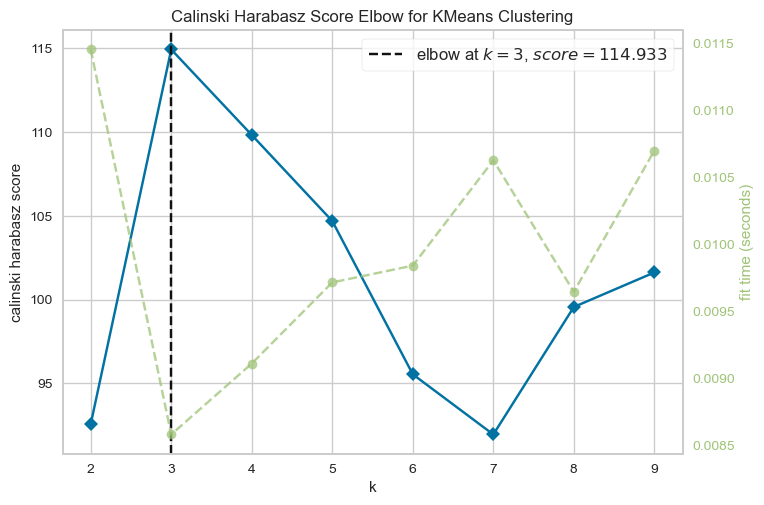

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [158]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')

visualizer.fit(scaled_features_psyco)    #fitting of the data to the visualizer
visualizer.show()                        #finalize and render the figure

C:\Users\ianth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


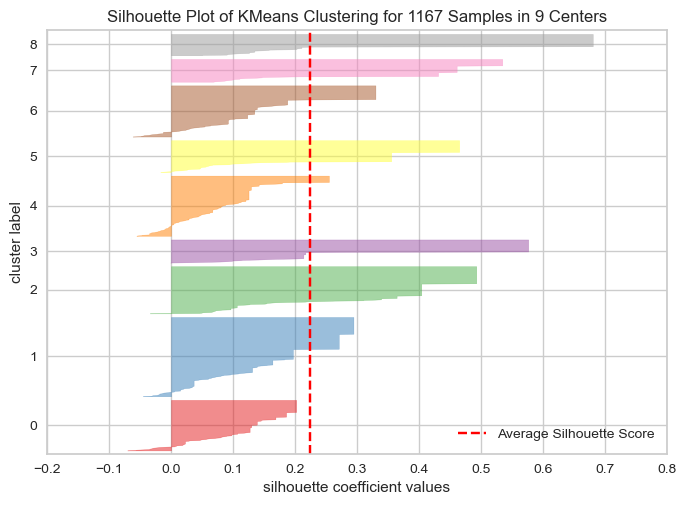

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1167 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [159]:
#silhouetteVisualizer
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_features_psyco)  #fitting of the data to the visualizer
visualizer.poof()

In [160]:
#append dataframe with cluster number
scaled_features_psyco['cluster'] = kmeans.labels_

In [161]:
cluster1=scaled_features_psyco.query("cluster == 0")
cluster2=scaled_features_psyco.query("cluster == 1")


In [162]:
cluster1.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,cluster
1,2.167137,0.893393,0.484632,0.316355,-0.203064,1.144692,-0.73881,0.199997,0.908337,-0.833767,0.051605,-0.699919,-1.378688,-0.207395,-0.529358,-0.635871,-0.281163,0
5,-1.071773,0.893393,0.040354,0.316355,-1.205074,-0.362620,-0.73881,0.199997,-0.540780,-1.567558,-1.365402,0.285371,-0.686675,1.241889,-1.134412,-0.635871,-0.281163,0
12,-1.071773,0.893393,0.040354,0.316355,-0.203064,1.144692,-0.73881,1.820802,-0.540780,1.367605,-1.365402,-1.685210,-0.686675,-1.656680,0.075697,-0.635871,0.929603,0
13,-1.071773,-1.119328,0.040354,0.316355,-0.203064,-0.362620,-0.73881,-0.610406,0.183778,-0.833767,1.468611,0.285371,-1.378688,0.517247,-0.529358,-0.635871,-1.491929,0
15,-1.071773,0.893393,0.040354,0.316355,1.800957,-1.116277,-0.73881,1.820802,0.908337,1.367605,1.468611,-1.685210,-1.378688,0.517247,-0.529358,1.572646,0.929603,0


In [163]:
cluster1.shape

(422, 18)

In [164]:
cluster1.describe()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,cluster
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.0
mean,-0.223670,0.793234,0.299341,-0.767697,0.518764,0.076715,0.279394,-0.055415,-0.061747,-0.077372,0.108688,-0.338024,-0.257037,0.242501,-0.262675,-0.389899,-0.309854,0.0
std,0.932163,0.438196,0.916758,1.150294,0.868116,1.088438,1.037888,1.048769,1.088725,1.113021,1.075031,0.908671,1.013672,1.041301,0.952813,0.695613,0.983459,0.0
min,-1.071773,-1.119328,-2.181034,-4.365358,-1.706079,-1.493105,-0.738810,-1.420809,-1.265338,-1.567558,-1.365402,-1.685210,-1.378688,-1.656680,-1.134412,-0.635871,-1.491929,0.0
25%,-1.071773,0.893393,0.040354,-1.690093,-0.203064,-1.116277,-0.738810,-1.420809,-1.265338,-0.833767,-1.188276,-1.685210,-1.378688,-0.207395,-1.134412,-0.635871,-1.491929,0.0
50%,-0.531955,0.893393,0.928910,-0.352461,0.798947,0.391036,0.674618,0.199997,0.183778,-0.099977,0.051605,0.285371,0.005337,0.517247,-0.529358,-0.635871,-0.281163,0.0
75%,0.007864,0.893393,0.928910,0.316355,0.798947,1.144692,0.674618,1.010399,0.908337,1.367605,1.468611,0.285371,0.697349,1.241889,0.680751,-0.635871,0.929603,0.0
max,2.167137,0.893393,0.928910,0.316355,2.301962,1.521520,2.794761,1.820802,1.632895,1.367605,1.468611,1.270662,1.389362,1.241889,1.285805,1.572646,0.929603,0.0


In [165]:
cluster2.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,cluster
8,-1.071773,0.893393,0.040354,0.316355,-1.205074,0.391036,-0.738810,1.010399,0.908337,0.633814,0.760108,-1.685210,-1.378688,-0.207395,-0.529358,1.572646,0.929603,1
17,-1.071773,-1.119328,0.040354,0.316355,-0.203064,0.391036,-0.738810,1.820802,-1.265338,-0.833767,-0.656898,-0.699919,0.005337,-1.656680,0.680751,-0.635871,-1.491929,1
20,-1.071773,0.893393,0.040354,0.316355,-0.203064,0.391036,0.674618,0.199997,1.632895,-0.099977,-0.656898,0.285371,-0.686675,-1.656680,0.680751,-0.635871,-1.491929,1
36,-1.071773,0.893393,0.040354,0.316355,-0.203064,1.144692,-0.738810,0.199997,1.632895,1.367605,0.760108,0.285371,0.005337,-1.656680,0.075697,-0.635871,-1.491929,1
45,-1.071773,-1.119328,0.040354,0.316355,-0.203064,0.391036,-0.738810,0.199997,-0.540780,-0.099977,0.760108,0.285371,-1.378688,-0.207395,-0.529358,1.572646,-1.491929,1


In [166]:
cluster2.shape

(247, 18)

In [167]:
cluster2.describe()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,cluster
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.0
mean,0.077800,-0.866720,-1.074837,0.310940,-0.815629,0.447484,-0.003484,0.147501,0.623793,-0.343583,-0.286870,-0.117521,-0.350475,-0.861627,-0.183962,0.508623,-0.462533,1.0
std,0.890779,0.668152,0.665347,0.134737,1.037409,1.032114,0.782508,1.005847,0.722947,0.803252,0.925350,1.252780,0.925177,0.612354,0.843864,1.105766,1.062548,0.0
min,-1.071773,-1.119328,-2.181034,-1.021277,-1.706079,-1.493105,-0.738810,-1.420809,-1.265338,-1.567558,-1.365402,-1.685210,-1.378688,-1.656680,-1.134412,-0.635871,-1.491929,1.0
25%,-0.531955,-1.119328,-1.736757,0.316355,-1.205074,-0.362620,-0.738810,-0.610406,0.183778,-0.833767,-0.656898,-1.685210,-1.378688,-1.656680,-1.134412,-0.635871,-1.491929,1.0
50%,0.007864,-1.119328,-1.292479,0.316355,-1.205074,0.391036,-0.738810,0.199997,0.908337,-0.099977,-0.656898,-0.699919,-0.686675,-0.932037,0.075697,1.572646,-0.281163,1.0
75%,1.087500,-1.119328,-0.848201,0.316355,-1.205074,1.521520,0.674618,1.010399,0.908337,0.633814,0.051605,1.270662,0.697349,-0.207395,0.680751,1.572646,0.929603,1.0
max,2.167137,0.893393,0.928910,0.985171,2.301962,1.521520,2.794761,1.820802,1.632895,1.367605,1.468611,1.270662,1.389362,1.241889,1.285805,1.572646,0.929603,1.0


In [168]:
cluster1_mean = kmeans.cluster_centers_[0]
cluster2_mean = kmeans.cluster_centers_[1]

In [169]:
cluster1_mean_p1 = cluster1_mean[:8]

In [170]:
cluster2_mean_p1 = cluster2_mean[:8]

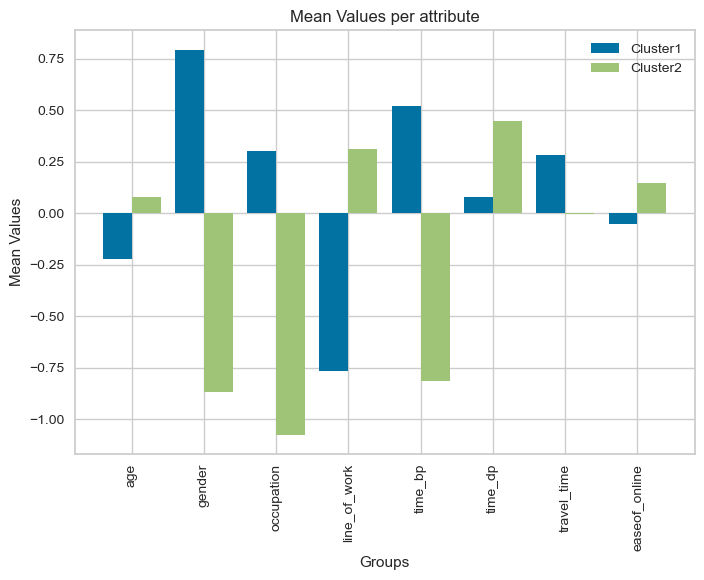

In [171]:
x = cluster1.keys()[:8]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, cluster1_mean_p1, 0.4, label = 'Cluster1')
plt.bar(x_axis + 0.2, cluster2_mean_p1, 0.4, label = 'Cluster2')


plt.xticks(x_axis, x, rotation='vertical')
plt.xlabel('Groups')
#plt.subplots_sdjust(bottom=0.1)
plt.ylabel('Mean Values')
plt.title('Mean Values per attribute')
plt.legend()
plt.show()

In [172]:
cluster1_mean_p2 = cluster1_mean[8:]
cluster2_mean_p2 = cluster2_mean[8:]

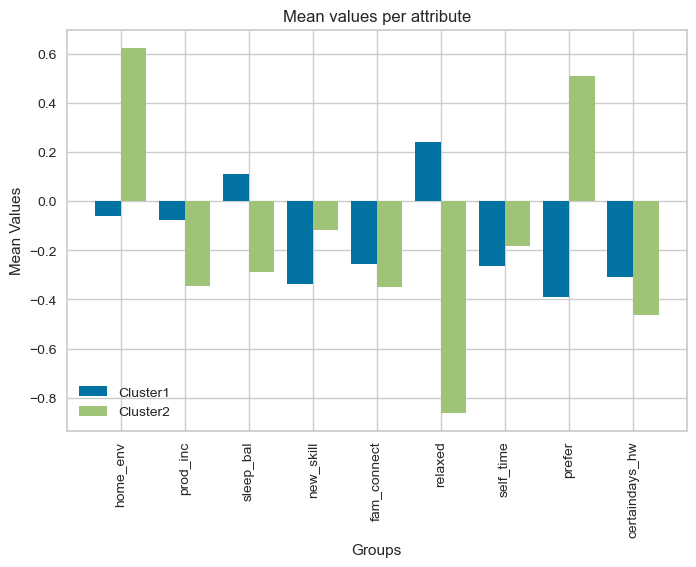

In [173]:
x = cluster1.keys()[8:-1]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, cluster1_mean_p2, 0.4, label = 'Cluster1')
plt.bar(x_axis + 0.2, cluster2_mean_p2, 0.4, label = 'Cluster2')


plt.xticks(x_axis, x, rotation='vertical')
plt.xlabel('Groups')
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.ylabel('Mean Values')
plt.title('Mean values per attribute')
plt.legend()
plt.show()

In [174]:
#heirarchical clustering

In [175]:
from sklearn.cluster import AgglomerativeClustering

x = scaled_features_psyco.sample(frac=0.01, replace=False, random_state=1)

#setting the distance threshold to 0 to compute the full tree
cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#changing of the parameters
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit(x)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

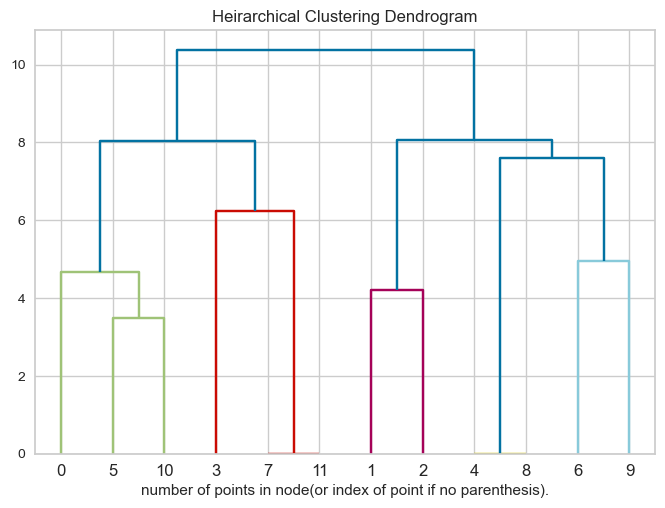

In [176]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    #creates a linkage matrix and then plots the dendrogram
    
    #create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 #leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)
    
    #plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plt.title('Heirarchical Clustering Dendrogram')
plot_dendrogram(cluster)

plt.xlabel('number of points in node(or index of point if no parenthesis).')
plt.show()

In [177]:
#changing of parameters
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(x)

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [178]:
#append dataframe with cluster number
x['cluster'] = cluster.labels_

In [179]:
#save each cluster data separately
cluster1=x.query("cluster == 0")
cluster2=x.query("cluster == 1")
cluster3=x.query("cluster == 2")

In [180]:
cluster1.describe()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,cluster
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
mean,0.547682,-1.119328,-1.736757,0.316355,0.798947,0.391036,-0.73881,-0.610406,0.183778,-0.099977,-0.656898,1.270662,0.697349,1.241889,-1.134412,-0.635871,0.929603,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.547682,-1.119328,-1.736757,0.316355,0.798947,0.391036,-0.73881,-0.610406,0.183778,-0.099977,-0.656898,1.270662,0.697349,1.241889,-1.134412,-0.635871,0.929603,0.0
25%,0.547682,-1.119328,-1.736757,0.316355,0.798947,0.391036,-0.73881,-0.610406,0.183778,-0.099977,-0.656898,1.270662,0.697349,1.241889,-1.134412,-0.635871,0.929603,0.0
50%,0.547682,-1.119328,-1.736757,0.316355,0.798947,0.391036,-0.73881,-0.610406,0.183778,-0.099977,-0.656898,1.270662,0.697349,1.241889,-1.134412,-0.635871,0.929603,0.0
75%,0.547682,-1.119328,-1.736757,0.316355,0.798947,0.391036,-0.73881,-0.610406,0.183778,-0.099977,-0.656898,1.270662,0.697349,1.241889,-1.134412,-0.635871,0.929603,0.0
max,0.547682,-1.119328,-1.736757,0.316355,0.798947,0.391036,-0.73881,-0.610406,0.183778,-0.099977,-0.656898,1.270662,0.697349,1.241889,-1.134412,-0.635871,0.929603,0.0


In [181]:
cluster2.describe()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,cluster
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0
mean,2.167137,-1.119328,0.484632,0.316355,-1.205074,-1.493105,-0.73881,0.199997,-0.54078,-1.567558,-0.656898,0.285371,1.389362,-1.65668,1.285805,-0.635871,-1.491929,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.167137,-1.119328,0.484632,0.316355,-1.205074,-1.493105,-0.73881,0.199997,-0.54078,-1.567558,-0.656898,0.285371,1.389362,-1.65668,1.285805,-0.635871,-1.491929,1.0
25%,2.167137,-1.119328,0.484632,0.316355,-1.205074,-1.493105,-0.73881,0.199997,-0.54078,-1.567558,-0.656898,0.285371,1.389362,-1.65668,1.285805,-0.635871,-1.491929,1.0
50%,2.167137,-1.119328,0.484632,0.316355,-1.205074,-1.493105,-0.73881,0.199997,-0.54078,-1.567558,-0.656898,0.285371,1.389362,-1.65668,1.285805,-0.635871,-1.491929,1.0
75%,2.167137,-1.119328,0.484632,0.316355,-1.205074,-1.493105,-0.73881,0.199997,-0.54078,-1.567558,-0.656898,0.285371,1.389362,-1.65668,1.285805,-0.635871,-1.491929,1.0
max,2.167137,-1.119328,0.484632,0.316355,-1.205074,-1.493105,-0.73881,0.199997,-0.54078,-1.567558,-0.656898,0.285371,1.389362,-1.65668,1.285805,-0.635871,-1.491929,1.0


In [182]:
cluster3.describe()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,prefer,certaindays_hw,cluster
count,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
mean,-0.531955,-1.119328,0.92891,-1.021277,0.798947,1.144692,-0.73881,0.199997,1.632895,1.367605,1.468611,0.285371,1.389362,1.241889,-1.134412,-0.635871,-0.281163,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-0.531955,-1.119328,0.92891,-1.021277,0.798947,1.144692,-0.73881,0.199997,1.632895,1.367605,1.468611,0.285371,1.389362,1.241889,-1.134412,-0.635871,-0.281163,2.0
25%,-0.531955,-1.119328,0.92891,-1.021277,0.798947,1.144692,-0.73881,0.199997,1.632895,1.367605,1.468611,0.285371,1.389362,1.241889,-1.134412,-0.635871,-0.281163,2.0
50%,-0.531955,-1.119328,0.92891,-1.021277,0.798947,1.144692,-0.73881,0.199997,1.632895,1.367605,1.468611,0.285371,1.389362,1.241889,-1.134412,-0.635871,-0.281163,2.0
75%,-0.531955,-1.119328,0.92891,-1.021277,0.798947,1.144692,-0.73881,0.199997,1.632895,1.367605,1.468611,0.285371,1.389362,1.241889,-1.134412,-0.635871,-0.281163,2.0
max,-0.531955,-1.119328,0.92891,-1.021277,0.798947,1.144692,-0.73881,0.199997,1.632895,1.367605,1.468611,0.285371,1.389362,1.241889,-1.134412,-0.635871,-0.281163,2.0


In [183]:
cluster1_mean = np.array(cluster1.mean())
cluster2_mean = np.array(cluster2.mean())
cluster3_mean = np.array(cluster3.mean())

In [184]:
cluster1_mean_p1 = cluster1_mean[:8]
cluster2_mean_p1 = cluster1_mean[:8]
cluster3_mean_p1 = cluster1_mean[:8]

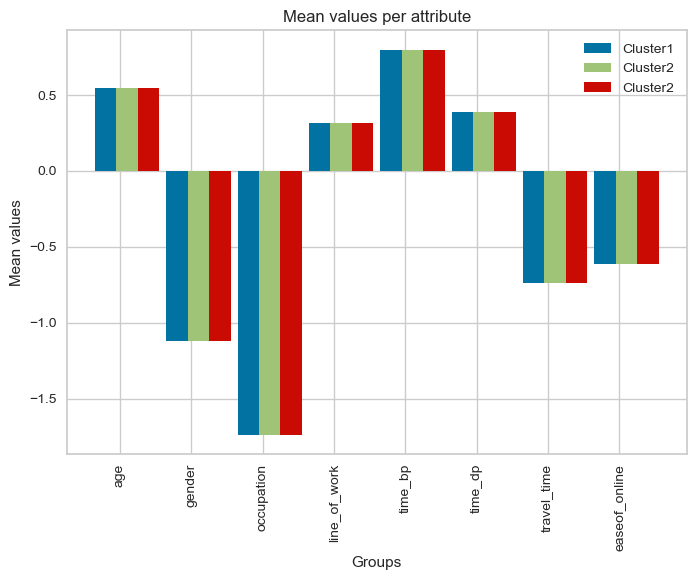

In [185]:
x = cluster1.keys()[:8]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, cluster1_mean_p1, 0.3, label = 'Cluster1')
plt.bar(x_axis + 0.1, cluster2_mean_p1, 0.3, label = 'Cluster2')
plt.bar(x_axis + 0.4, cluster3_mean_p1, 0.3, label = 'Cluster2')

plt.xticks(x_axis, x, rotation='vertical')
plt.xlabel('Groups')
#plt.subplots_adjust(bottom=0.1)
plt.ylabel('Mean values')
plt.title('Mean values per attribute')
plt.legend()
plt.show()

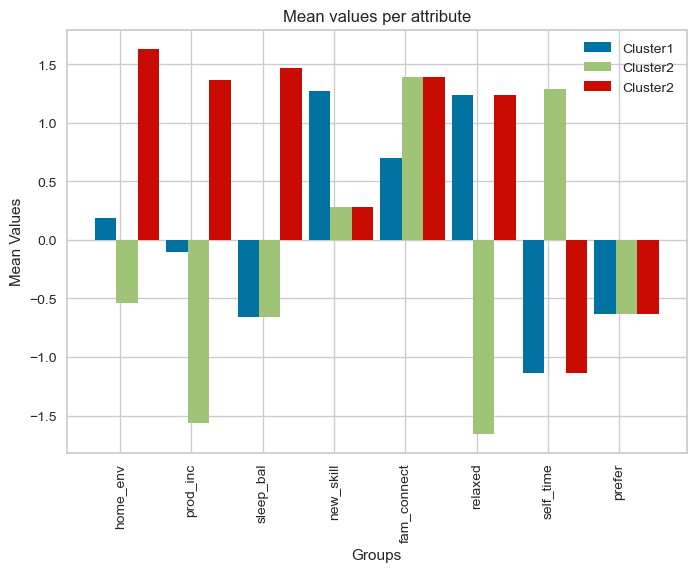

In [186]:
cluster1_mean_p2 = cluster1_mean[8:-2]
cluster2_mean_p2 = cluster2_mean[8:-2]
cluster3_mean_p2 = cluster3_mean[8:-2]

x = cluster1.keys()[8:-2]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, cluster1_mean_p2, 0.3, label = 'Cluster1')
plt.bar(x_axis + 0.1, cluster2_mean_p2, 0.3, label = 'Cluster2')
plt.bar(x_axis + 0.4, cluster3_mean_p2, 0.3, label = 'Cluster2')

plt.xticks(x_axis, x, rotation = 'vertical')
plt.xlabel('Groups')
plt.ylabel('Mean Values')
plt.title('Mean values per attribute')
plt.legend()
plt.show()